### **Converting .json files to tf.constant**

In [2]:
import os
import tensorflow as tf
import json
import numpy as np

dataset_json_path = "C:\\Users\\DELL\\Desktop\\Pulchowk\\Major_Project\\ChordClassification\\ChordDatasets\\dataset_json"
c = 1

# List all files in the folder
for file_name in os.listdir(dataset_json_path):
    file_path = os.path.join(dataset_json_path, file_name)  # Full file path
    
    if file_name.endswith(".json"):  # Process only .json files
        with open(file_path, "r") as json_file:  # Open the file
            json_data = json.load(json_file)  # Load JSON content
            # print(json_data)  # Debugging: print JSON content

    
            # Convert JSON data to TF-compatible format
            if isinstance(json_data, dict):
                # Assuming a dictionary with scalar values
                tf_data = {k: tf.constant(v) for k, v in json_data.items()}
            elif isinstance(json_data, list):
                # Assuming a list of scalars or arrays
                tf_data = [tf.constant(x) for x in json_data]
            elif isinstance(json_data, np.ndarray):
                # Assuming a JSON-encoded NumPy array
                tf_data = tf.constant(json_data)
            else:
                raise ValueError("Unsupported JSON data structure")
            print(tf_data)


            if c == 1:
                tf_data_X = tf.constant(tf_data['pitch'])
                tf_data_Y = tf.constant(tf_data['labels'])
                c = 0
            else:
                tf_data_X = tf.concat([tf_data_X, tf.constant(tf_data['pitch'])], axis=0)
                tf_data_Y = tf.concat([tf_data_Y, tf.constant(tf_data['labels'])], axis=0)

print(tf_data_X.shape)
print(tf_data_Y.shape)
# print(tf_data_X)
# print(tf_data_Y)

{'mapping': <tf.Tensor: shape=(1,), dtype=string, numpy=array([b'A#m'], dtype=object)>, 'labels': <tf.Tensor: shape=(1, 13), dtype=int32, numpy=array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]], dtype=int32)>, 'pitch': <tf.Tensor: shape=(1, 12), dtype=float32, numpy=
array([[0.06438943, 0.14778799, 0.06286415, 0.01080172, 0.00386915,
        0.2669169 , 0.00933546, 0.01446083, 0.06963988, 0.07749876,
        0.25869045, 0.01374527]], dtype=float32)>}
{'mapping': <tf.Tensor: shape=(1,), dtype=string, numpy=array([b'A#m'], dtype=object)>, 'labels': <tf.Tensor: shape=(1, 13), dtype=int32, numpy=array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]], dtype=int32)>, 'pitch': <tf.Tensor: shape=(1, 12), dtype=float32, numpy=
array([[0.05730631, 0.21261251, 0.05818551, 0.01028363, 0.00219754,
        0.2609214 , 0.0085635 , 0.01240559, 0.06731864, 0.06476278,
        0.23366158, 0.01178104]], dtype=float32)>}
{'mapping': <tf.Tensor: shape=(1,), dtype=string, numpy=array([b'A#m'], dtype=object)>, 'label

In [3]:
# Cast tf_data_Y to float32 to match tf_data_X
tf_data_Y = tf.cast(tf_data_Y, tf.float32)

In [4]:
import numpy as np

# Check if there are any NaN values
print("NaN in tf_data_X:", np.isnan(tf_data_X).any())  

# Get indices of NaN values
nan_indices = np.argwhere(np.isnan(tf_data_X))  

# Print the locations (row, column) of NaNs
print("NaN locations in tf_data_X:", nan_indices)


NaN in tf_data_X: False
NaN locations in tf_data_X: []


In [5]:
tf_dataset = tf.concat([tf_data_X, tf_data_Y], axis=-1)
print(tf_dataset.shape)
print(tf_dataset)

(3265, 25)
tf.Tensor(
[[0.06438943 0.14778799 0.06286415 ... 0.         0.         1.        ]
 [0.05730631 0.21261251 0.05818551 ... 0.         0.         1.        ]
 [0.067454   0.13290407 0.0649313  ... 0.         0.         1.        ]
 ...
 [0.00851205 0.00818775 0.4770042  ... 0.         0.         0.        ]
 [0.01338249 0.01540688 0.42645866 ... 0.         0.         0.        ]
 [0.0080606  0.00664939 0.5191406  ... 0.         0.         0.        ]], shape=(3265, 25), dtype=float32)


In [6]:
tf_dataset = tf.random.shuffle(tf_dataset)
print(tf_dataset[:5])

tf.Tensor(
[[0.02260029 0.01102129 0.42328125 0.0127542  0.0054522  0.01051472
  0.03820438 0.04580735 0.00645691 0.01818011 0.00679938 0.3989279
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         1.         0.         0.
  0.        ]
 [0.06580628 0.01128911 0.00554575 0.00948233 0.25990728 0.04289522
  0.02142537 0.02849222 0.02098411 0.511872   0.00622848 0.01607188
  0.         1.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.        ]
 [0.00374451 0.00301859 0.24665697 0.0047419  0.00459631 0.01137827
  0.02321278 0.53061527 0.01799624 0.00679325 0.00347279 0.14377308
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         1.         0.         0.
  0.        ]
 [0.00431533 0.07883751 0.00640348 0.2462614  0.01826754 0.01201475
  0.27735728 0.03900322 0.00728994 0.01235504 0.11008237 0.18781213
  0.         0.         0.         0.       

In [7]:
X = tf_dataset[:,:-13]
print(X[:5])

tf.Tensor(
[[0.02260029 0.01102129 0.42328125 0.0127542  0.0054522  0.01051472
  0.03820438 0.04580735 0.00645691 0.01818011 0.00679938 0.3989279 ]
 [0.06580628 0.01128911 0.00554575 0.00948233 0.25990728 0.04289522
  0.02142537 0.02849222 0.02098411 0.511872   0.00622848 0.01607188]
 [0.00374451 0.00301859 0.24665697 0.0047419  0.00459631 0.01137827
  0.02321278 0.53061527 0.01799624 0.00679325 0.00347279 0.14377308]
 [0.00431533 0.07883751 0.00640348 0.2462614  0.01826754 0.01201475
  0.27735728 0.03900322 0.00728994 0.01235504 0.11008237 0.18781213]
 [0.00229452 0.08321963 0.00301723 0.12992096 0.01166777 0.00696324
  0.11073131 0.02458359 0.00396025 0.00502266 0.07505188 0.54356694]], shape=(5, 12), dtype=float32)


In [8]:
y = tf_dataset[:,-13:]
print(y[:5].shape)
print(y[:5])
# y = tf.expand_dims(y, axis = -1)
# print(y[:5])

(5, 13)
tf.Tensor(
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]], shape=(5, 13), dtype=float32)


In [9]:
print(X.shape)

(3265, 12)


In [10]:
import numpy as np

# Check if there are any NaN values
print("NaN in X:", np.isnan(X).any())  

# Get indices of NaN values
nan_indices = np.argwhere(np.isnan(X))  

# Print the locations (row, column) of NaNs
print("NaN locations in X:", nan_indices)


NaN in X: False
NaN locations in X: []


In [11]:
TRAIN_RATIO = 0.8
VAL_RATIO = 0.1
TEST_RATIO = 0.1
DATASET_SIZE = len(X)
print(DATASET_SIZE)

3265


In [12]:
X_train = X[:int(DATASET_SIZE*TRAIN_RATIO)]
y_train = y[:int(DATASET_SIZE*TRAIN_RATIO)]
print(X_train.shape)
print(X_train)
print(y_train.shape)

(2612, 12)
tf.Tensor(
[[0.02260029 0.01102129 0.42328125 ... 0.01818011 0.00679938 0.3989279 ]
 [0.06580628 0.01128911 0.00554575 ... 0.511872   0.00622848 0.01607188]
 [0.00374451 0.00301859 0.24665697 ... 0.00679325 0.00347279 0.14377308]
 ...
 [0.00969947 0.00602531 0.01496788 ... 0.0197851  0.00830161 0.28759843]
 [0.00478913 0.00672756 0.01817064 ... 0.00490242 0.0036243  0.42491487]
 [0.00315417 0.00416337 0.03689392 ... 0.00593345 0.00439254 0.43230137]], shape=(2612, 12), dtype=float32)
(2612, 13)


In [13]:
import numpy as np

# Check if there are any NaN values
print("NaN in X_train:", np.isnan(X_train).any())  

# Get indices of NaN values
nan_indices = np.argwhere(np.isnan(X_train))  

# Print the locations (row, column) of NaNs
print("NaN locations in X_train:", nan_indices)


NaN in X_train: False
NaN locations in X_train: []


In [14]:
# Function to add noise
def add_noise(X, noise_level=0.02):
    noise = tf.random.normal(shape=tf.shape(X), mean=0.0, stddev=noise_level, dtype=tf.float32)
    return X + noise

# Function to shift pitch
def shift_pitch(X, shift_steps):
    return tf.roll(X, shift=shift_steps, axis=1)  # Rolls along pitch axis

# Function to scale pitch energy
def scale_pitch(X, scale_factor=0.1):
    return X * (1 + scale_factor * tf.random.normal(shape=tf.shape(X), mean=0.0, stddev=1.0))

# Function to create augmented versions
def augment_data(X, y, num_augmentations=3):
    augmented_X = []
    augmented_y = []
    
    for _ in range(num_augmentations):
        X_aug = add_noise(X)
        X_aug = shift_pitch(X_aug, shift_steps=np.random.randint(-2, 3))  # Shift -2 to +2
        X_aug = scale_pitch(X_aug)
        
        augmented_X.append(X_aug)
        augmented_y.append(y)  # Labels stay the same
    
    return tf.concat([X] + augmented_X, axis=0), tf.concat([y] + augmented_y, axis=0)

# Apply augmentation
num_augmentations = 1  # Creates 3 additional versions, so dataset size increases 4x
X_augmented, y_augmented = augment_data(X_train, y_train, num_augmentations=num_augmentations)

# Shuffle dataset
tf_dataset = tf.concat([X_augmented, y_augmented], axis=-1)
tf_dataset = tf.random.shuffle(tf_dataset)

# Split dataset back
X_train_aug = tf_dataset[:, :-13]
y_train_aug = tf_dataset[:, -13:]

print(f"Original dataset size: {X_train_aug.shape[0] // (num_augmentations + 1)}")
print(f"Augmented dataset size: {X_train_aug.shape[0]}")


Original dataset size: 2612
Augmented dataset size: 5224


In [15]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
#aug train_dataset = tf.data.Dataset.from_tensor_slices((X_train_aug, y_train_aug))
train_dataset = train_dataset.shuffle(buffer_size = 8, reshuffle_each_iteration = True).batch(16).prefetch(tf.data.AUTOTUNE)

In [16]:
for x,_y in train_dataset:
  print(x,_y)
  break

tf.Tensor(
[[0.06580628 0.01128911 0.00554575 0.00948233 0.25990728 0.04289522
  0.02142537 0.02849222 0.02098411 0.511872   0.00622848 0.01607188]
 [0.00478815 0.78979015 0.00126868 0.00261818 0.0933517  0.01402818
  0.00334808 0.0021469  0.00870848 0.03082202 0.00307818 0.04605127]
 [0.0020693  0.08429372 0.00309986 0.15770428 0.00926983 0.00644534
  0.12778665 0.02756182 0.00354738 0.00495258 0.07841832 0.4948509 ]
 [0.00431533 0.07883751 0.00640348 0.2462614  0.01826754 0.01201475
  0.27735728 0.03900322 0.00728994 0.01235504 0.11008237 0.18781213]
 [0.02260029 0.01102129 0.42328125 0.0127542  0.0054522  0.01051472
  0.03820438 0.04580735 0.00645691 0.01818011 0.00679938 0.3989279 ]
 [0.00319893 0.72380394 0.00213656 0.0070381  0.10729884 0.00918509
  0.00539899 0.00353813 0.00841068 0.06150429 0.00503587 0.0634506 ]
 [0.00374451 0.00301859 0.24665697 0.0047419  0.00459631 0.01137827
  0.02321278 0.53061527 0.01799624 0.00679325 0.00347279 0.14377308]
 [0.00562479 0.01355386 0.2474

In [17]:
X_val = X[int(DATASET_SIZE*TRAIN_RATIO):int(DATASET_SIZE*(TRAIN_RATIO+VAL_RATIO))]
y_val = y[int(DATASET_SIZE*TRAIN_RATIO):int(DATASET_SIZE*(TRAIN_RATIO+VAL_RATIO))]
print(X_val.shape)
print(y_val.shape)

(326, 12)
(326, 13)


In [18]:
val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val))
val_dataset = val_dataset.shuffle(buffer_size = 8, reshuffle_each_iteration = True).batch(16).prefetch(tf.data.AUTOTUNE)

In [19]:
for x,__y in val_dataset:
  print(x,__y)
  break

tf.Tensor(
[[3.62176471e-03 1.32286111e-02 2.63969302e-01 1.39746293e-02
  1.47962589e-02 1.15676774e-02 5.26452437e-02 4.28639174e-01
  1.41764190e-02 2.78508589e-02 3.41528608e-03 1.52114749e-01]
 [2.44784150e-02 8.24885890e-02 1.00731634e-01 1.76630113e-02
  1.50872162e-02 4.18621767e-03 4.82668430e-01 3.57319857e-03
  4.19568876e-03 1.15328461e-01 8.38317722e-03 1.41215965e-01]
 [3.73939099e-03 1.38557318e-03 4.19234246e-01 4.34301002e-03
  4.64935740e-03 3.35909069e-01 3.92600847e-03 2.74078717e-04
  5.51859499e-04 4.42878809e-03 2.19140157e-01 2.41848361e-03]
 [1.29579315e-02 1.10584777e-02 2.99531728e-01 7.57371401e-03
  8.31912085e-03 1.20477481e-02 5.78653336e-01 9.32865869e-03
  7.30878673e-03 3.35294642e-02 8.77174083e-03 1.09192906e-02]
 [2.06514094e-02 8.59589428e-02 7.11575598e-02 1.87807716e-02
  1.34157166e-02 1.06425618e-03 4.94039685e-01 1.08134677e-03
  1.49549823e-03 1.12211160e-01 7.28795538e-03 1.72855675e-01]
 [4.67272615e-03 1.58214103e-02 1.14879690e-01 8.10070

In [20]:
X_test = X[int(DATASET_SIZE*(TRAIN_RATIO+VAL_RATIO)):]
y_test = y[int(DATASET_SIZE*(TRAIN_RATIO+VAL_RATIO)):]
print(X_test.shape)
print(y_test.shape)

(327, 12)
(327, 13)


In [21]:
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))
test_dataset = test_dataset.shuffle(buffer_size = 8, reshuffle_each_iteration = True).batch(16).prefetch(tf.data.AUTOTUNE)

In [22]:
import numpy as np

# Check if there are NaN or Inf values in training data
print("NaN in X_train:", np.isnan(X_train).any())
print("Inf in X_train:", np.isinf(X_train).any())
print("NaN in y_train:", np.isnan(y_train).any())
print("Inf in y_train:", np.isinf(y_train).any())


NaN in X_train: False
Inf in X_train: False
NaN in y_train: False
Inf in y_train: False


### **Model Creation**

In [23]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Normalization, Dense, InputLayer, Dropout, BatchNormalization, LSTM, GRU
from tensorflow.keras.losses import MeanSquaredError, Huber, MeanAbsoluteError, CategoricalCrossentropy
from tensorflow.keras.metrics import TopKCategoricalAccuracy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler

In [24]:
model = tf.keras.Sequential([
                             InputLayer(input_shape = (12,)),

                             Dense(128),
                             BatchNormalization(),
                             tf.keras.layers.ReLU(),
                             Dropout(0.2),

                             Dense(128),
                             BatchNormalization(),
                             tf.keras.layers.ReLU(),
                             Dropout(0.3),

                             Dense(13, activation="softmax"),
])
model.summary()

c:\Users\DELL\Desktop\Pulchowk\Major_Project\ChordClassification\ChordClassification\.venv\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu (ReLU)                    │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_1 (ReLU)                  │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 13)             │         1,677 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,877 (81.55 KB)

 Trainable params: 20,365 (79.55 KB)

 Non-trainable params: 512 (2.00 KB)

In [25]:
import numpy as np

# Check if there are NaN or Inf values in training data
print("NaN in X_train:", np.isnan(X_train).any())
print("Inf in X_train:", np.isinf(X_train).any())
print("NaN in y_train:", np.isnan(y_train).any())
print("Inf in y_train:", np.isinf(y_train).any())


NaN in X_train: False
Inf in X_train: False
NaN in y_train: False
Inf in y_train: False


In [26]:
tf.keras.utils.plot_model(model, to_file = "model.png", show_shapes=True)

You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


In [27]:
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.001,
    decay_steps=1000,   # Adjust step size  500
    decay_rate=0.98,   # Smoother decay     .95
    staircase=True
)

# optimizer = Adam(learning_rate=lr_schedule)
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

In [28]:
model.compile(optimizer = optimizer, 
              loss=CategoricalCrossentropy(),
              metrics=[TopKCategoricalAccuracy(k=8)]) # For example, top-5 accuracy

In [29]:
history = model.fit(train_dataset, validation_data=val_dataset, epochs = 80, verbose = 1)

Epoch 1/80
164/164 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.5117 - top_k_categorical_accuracy: 0.9375 - val_loss: 1.9522 - val_top_k_categorical_accuracy: 0.9755
Epoch 2/80
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4700 - top_k_categorical_accuracy: 0.9995 - val_loss: 0.8902 - val_top_k_categorical_accuracy: 1.0000
Epoch 3/80
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3584 - top_k_categorical_accuracy: 1.0000 - val_loss: 0.2831 - val_top_k_categorical_accuracy: 1.0000
Epoch 4/80
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3325 - top_k_categorical_accuracy: 0.9987 - val_loss: 0.1684 - val_top_k_categorical_accuracy: 1.0000
Epoch 5/80
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2806 - top_k_categorical_accuracy: 0.9996 - val_loss: 0.1476 - val_top_k_categorical_accuracy: 1.0000
Epoch 6/80
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2615 - top_k_categorical_accuracy: 0.9989 - val_loss: 0.1293 - val_top_k_categorical_accuracy: 1.0000
Epoch 7/80
164/1

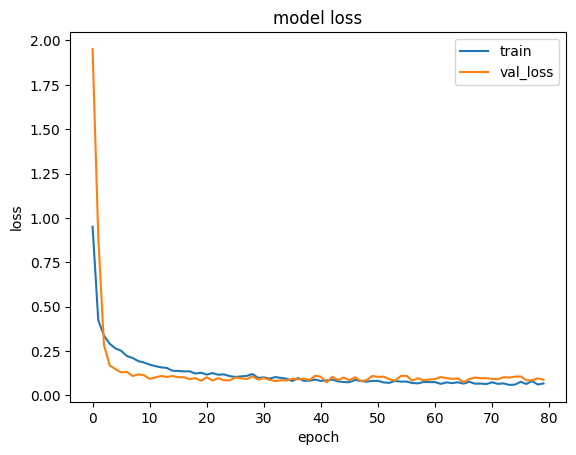

In [30]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val_loss'])
plt.show()

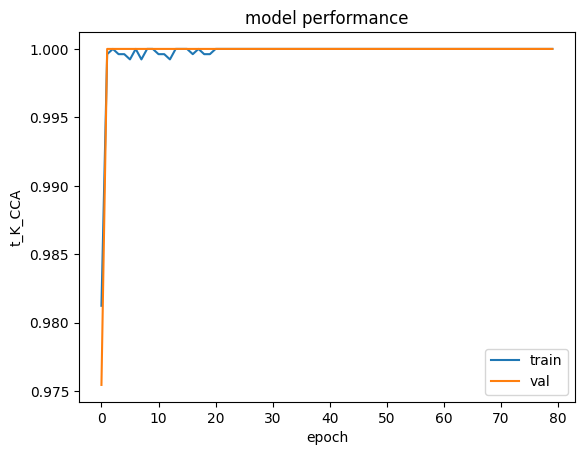

In [31]:
plt.plot(history.history['top_k_categorical_accuracy'])
plt.plot(history.history['val_top_k_categorical_accuracy'])
plt.title('model performance')
plt.ylabel('t_K_CCA')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.show()

In [32]:
# %pip install seaborn

In [33]:
y_pred = model.predict(X_test)
y_pred_classes = tf.argmax(y_pred, axis=1)
y_true_classes = tf.argmax(y_test, axis=1)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


In [34]:
confusion_mtx = tf.math.confusion_matrix(y_true_classes, y_pred_classes, num_classes=13)

<Axes: >

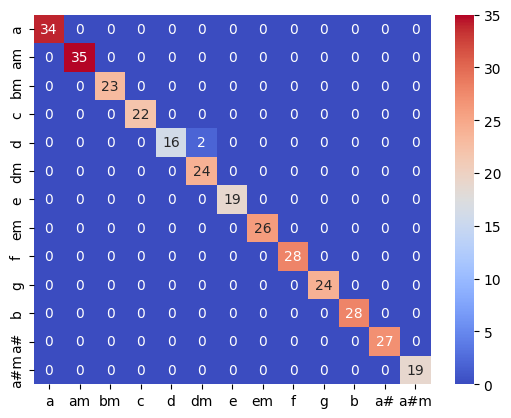

In [40]:
import seaborn as sns
labels = ['a', 'am', 'bm', 'c', 'd', 'dm', 'e', 'em', 'f', 'g', 'b', 'a#', 'a#m']
sns.heatmap(confusion_mtx, annot=True, fmt='g', xticklabels=labels, yticklabels=labels,cmap='coolwarm') #, vmin=0, vmax=30

In [36]:
print('End')

End


#### PCP bar graphs

In [37]:
import matplotlib.pyplot as plt


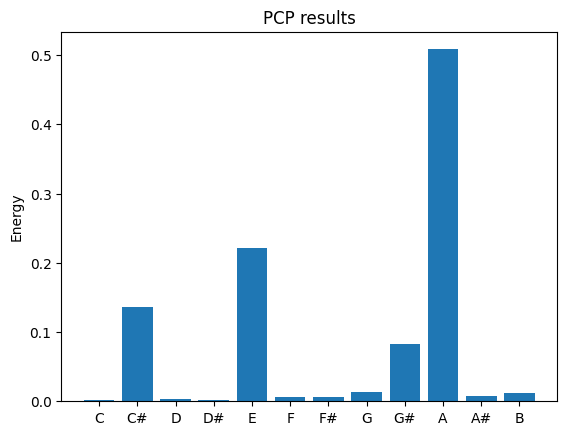

In [39]:
pitch = [
            0.0023146720618913187,
            0.13541123174584477,
            0.002753804814052944,
            0.0016777679064559055,
            0.22138365360133072,
            0.005979670177444035,
            0.006189081758443196,
            0.013713444747058249,
            0.08279445457778613,
            0.5082383956629952,
            0.007580531012396195,
            0.01196329193430142
        ]


objects = ('C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B')
y_pos = np.arange(len(objects))
plt.bar(y_pos, pitch, align='center', alpha=1.0)
plt.xticks(y_pos, objects)
plt.ylabel('Energy')
plt.title('PCP results')
plt.show()